## Test PSF measurement in the stack

and test ZOGY using measured PSFs

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
if num_cores == 32:
    num_cores = 24  # lsst-dev - don't use all the cores, man.
elif num_cores == 8:
    num_cores = 3
elif num_cores == 4:
    num_cores = 2
print num_cores

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

import warnings
warnings.filterwarnings('ignore')

3


Make a couple of test images to test the PSF measurement on...

For reference, PSFEx documentation:

http://psfex.readthedocs.io/en/latest/Working.html

In [3]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj.runTest()

In [3]:
reload(dit)
res = dit.measurePsf(testObj.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj.im2.psf = res.psf.computeImage().getArray()

testObj.reset()
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 37, 'TP': 7},
 'ZOGY': {'FN': 1, 'FP': 57, 'TP': 7}}

In [52]:
reload(dit)
res = dit.measurePsf(testObj.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj.im1.psf = dit.afwPsfToArray(res.psf, testObj.im1.asAfwExposure())

res = dit.measurePsf(testObj.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj.im2.psf = dit.afwPsfToArray(res.psf, testObj.im2.asAfwExposure())

testObj.reset()
testObj.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 1, 'FP': 8, 'TP': 7},
 'ZOGY': {'FN': 1, 'FP': 8, 'TP': 7}}

See how it works on a crowded field.

In [88]:
reload(dit)
testObj2 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=500, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj2.psf1_orig = testObj2.im1.psf
testObj2.psf2_orig = testObj2.im2.psf
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 7, 'FP': 7, 'TP': 1},
 'ZOGY': {'FN': 8, 'FP': 8, 'TP': 0}}

In [89]:
res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = res.psf.computeImage().getArray()

testObj2.reset()
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 8, 'FP': 9, 'TP': 0},
 'ZOGY': {'FN': 8, 'FP': 155, 'TP': 0}}

In [90]:
reload(dit)
res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = dit.afwPsfToArray(res.psf, testObj2.im1.asAfwExposure())

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = dit.afwPsfToArray(res.psf, testObj2.im2.asAfwExposure())

testObj2.reset()
testObj2.runTest()

{'ALstack': {'FN': 1, 'FP': 0, 'TP': 7},
 'ALstack_noDecorr': {'FN': 0, 'FP': 0, 'TP': 8},
 'SZOGY': {'FN': 8, 'FP': 8, 'TP': 0},
 'ZOGY': {'FN': 8, 'FP': 23, 'TP': 0}}

0.0722311288118 0.0621698996453
0.999999356258 1.0


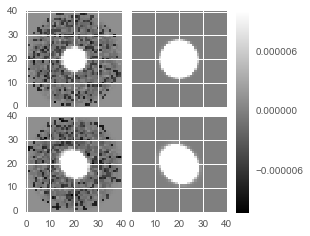

In [91]:
print testObj2.im1.psf.max(), testObj2.psf1_orig.max()
print testObj2.im1.psf.sum(), testObj2.psf1_orig.sum()
dit.plotImageGrid((testObj2.im1.psf, testObj2.psf1_orig, testObj2.im2.psf, testObj2.psf2_orig))

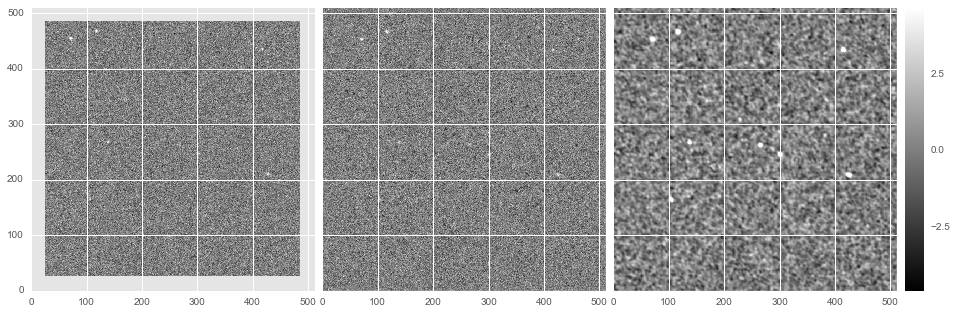

In [92]:
fig = plt.figure(1, (16, 16))
obj = testObj2
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))

Finally a very crowded field!

In [ ]:
reload(dit)
testObj3 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=5000, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj3.psf1_orig = testObj3.im1.psf
testObj3.psf2_orig = testObj3.im2.psf
testObj3.runTest()

In [ ]:
res = dit.measurePsf(testObj3.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im1.psf = res.psf.computeImage().getArray()

res = dit.measurePsf(testObj3.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im2.psf = res.psf.computeImage().getArray()

testObj3.reset()
testObj3.runTest()

In [ ]:
reload(dit)
res = dit.measurePsf(testObj3.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im1.psf = dit.afwPsfToArray(res.psf, testObj3.im1.asAfwExposure())

res = dit.measurePsf(testObj3.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj3.im2.psf = dit.afwPsfToArray(res.psf, testObj3.im2.asAfwExposure())

testObj3.reset()
testObj3.runTest()

In [ ]:
fig = plt.figure(1, (16, 16))
obj = testObj3
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))

There are issues with calling `psf.computeImage()`. That uses psf.getAveragePosition() by default which is the average of positions of stars that were used to measure the PSF. Even for small offsets (apparently only 20-30 pixels) this can lead to offsets in the PSF in the output image. This is shown below.

(252.77, 254.7)
256.0 256.0


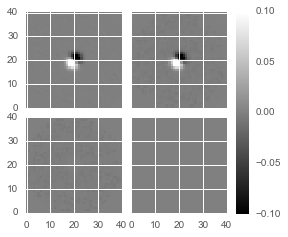

In [88]:
obj = testObj2
psf2 = obj.psf1_orig

res = dit.measurePsf(obj.im1.asAfwExposure(), measurePsfAlg='psfex')
print res.psf.getAveragePosition()
tmp1 = res.psf.computeImage().getArray()
tmp1 /= tmp1.max()

import lsst.afw.geom as afwGeom
img = obj.res.decorrelatedDiffim
bbox = img.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
print xcen, ycen
tmp2 = res.psf.computeImage(afwGeom.Point2D(xcen, ycen)).getArray()
tmp2 /= tmp2.max()
tmp3 = dit.afwPsfToArray(res.psf, obj.im1.asAfwExposure())
tmp3 /= tmp3.max()
dit.plotImageGrid((tmp1 - tmp2, tmp1-psf2/psf2.max(), tmp3-psf2/psf2.max(), tmp3-obj.im1.psf/obj.im1.psf.max()), 
                  clim=(-0.1,0.1))

In [89]:
sh = dit.arrayToAfwPsf(testObj2.psf1_orig).computeShape()
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(testObj2.psf1_orig)
sh = dit.afwPsfToShape(res.psf, obj.im1.asAfwExposure())
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(dit.afwPsfToArray(res.psf, obj.im1.asAfwExposure()))

[1.5999732062394578, 2.5599142606841707, 2.5599142606841707, 0.0]
(20.0, 20.000000000000004)
[1.5955657979980766, 2.548277101785016, 2.543387155722018, 0.001939721489219229]
(20.079280348226085, 19.980149486490895)


(255.97, 253.56)
256.0 256.0


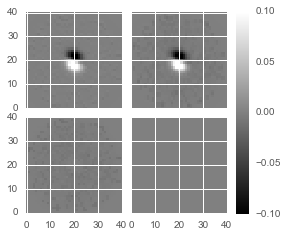

In [84]:
obj = testObj2
psf2 = obj.psf2_orig

res = dit.measurePsf(obj.im2.asAfwExposure(), measurePsfAlg='psfex')
print res.psf.getAveragePosition()
tmp1 = res.psf.computeImage().getArray()
tmp1 /= tmp1.max()

import lsst.afw.geom as afwGeom
img = obj.res.decorrelatedDiffim
bbox = img.getBBox()
xcen = (bbox.getBeginX() + bbox.getEndX()) / 2.
ycen = (bbox.getBeginY() + bbox.getEndY()) / 2.
print xcen, ycen
tmp2 = res.psf.computeImage(afwGeom.Point2D(xcen, ycen)).getArray()
tmp2 /= tmp2.max()
tmp3 = dit.afwPsfToArray(res.psf, obj.im2.asAfwExposure())
tmp3 /= tmp3.max()
dit.plotImageGrid((tmp1 - tmp2, tmp1-psf2/psf2.max(), tmp3-psf2/psf2.max(), tmp3-obj.im2.psf/obj.im2.psf.max()), 
                  clim=(-0.1,0.1))

0.0479723922908 0.0401906421949
1.00000019158 1.0


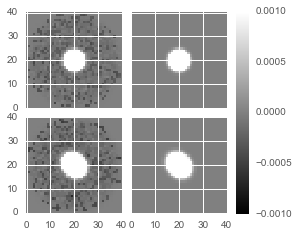

In [85]:
print testObj2.im2.psf.max(), testObj2.psf2_orig.max()
print testObj2.im2.psf.sum(), testObj2.psf2_orig.sum()
dit.plotImageGrid((testObj2.im1.psf, testObj2.psf1_orig, testObj2.im2.psf, testObj2.psf2_orig), clim=(-0.001,0.001))

[1.989961637274519, 4.039946238041112, 4.039946238041112, -0.799989278877403]
(20.0, 20.000000000000004)
[1.9720750897844168, 3.971511640609692, 3.9634502761008146, -0.7848212659993815]
(20.023956000654419, 19.959110121189269)


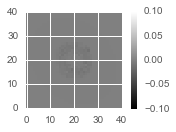

In [86]:
sh = dit.arrayToAfwPsf(testObj2.psf2_orig).computeShape()
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(testObj2.psf2_orig)
sh = dit.afwPsfToShape(res.psf, obj.im2.asAfwExposure())
print [sh.getDeterminantRadius(), sh.getIxx(), sh.getIyy(), sh.getIxy()]
print dit.computeMoments(dit.afwPsfToArray(res.psf, obj.im2.asAfwExposure()))

moments = dit.computeMoments(tmp3)
sh = dit.arrayToAfwPsf(tmp3).computeShape()
xgrid, ygrid = np.meshgrid(np.arange(0, psf2.shape[0]), np.arange(psf2.shape[1]))
rad = np.sqrt((xgrid - moments[0])**2 + (ygrid - moments[1])**2)
tmp3a = tmp3.copy()
tmp3a[(rad > sh.getDeterminantRadius() * 4.) | (np.abs(tmp3a) <= 1e-3)] = 0.
dit.plotImageGrid((tmp3a - psf2/psf2.max(),), clim=(-0.1,0.1))

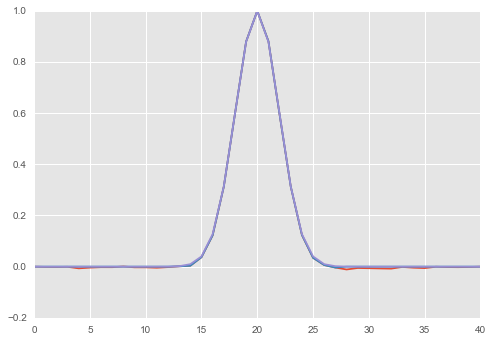

In [87]:
plt.plot(tmp3[20,:])
plt.plot(tmp3a[20,:])
plt.plot(psf2[20,:]/psf2.max())

OK, I just showed that the fitted PSFs for `testObj2` are good. So why is the ZOGY diffim so crappy?

0.0722311288118 0.0621698996453
0.999999356258 1.0


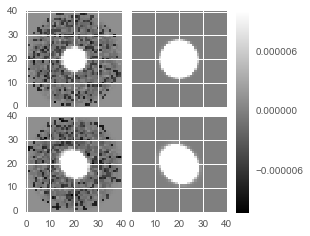

In [37]:
reload(dit)

testObj2 = dit.DiffimTest(imSize=(512,512), sky=sky, psf1=[1.6,1.6], psf2=[1.8,2.2],
                         offset=[0,0], psf_yvary_factor=0., 
                         varFlux2=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         variablesNearCenter=False,
                         theta1=0., theta2=-45., im2background=0., n_sources=500, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=21)
testObj2.psf1_orig = testObj2.im1.psf
testObj2.psf2_orig = testObj2.im2.psf

res = dit.measurePsf(testObj2.im1.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im1.psf = testObj2.psf1_fitted = dit.afwPsfToArray(res.psf, testObj2.im1.asAfwExposure())

res = dit.measurePsf(testObj2.im2.asAfwExposure(), measurePsfAlg='psfex')
testObj2.im2.psf = testObj2.psf2_fitted = dit.afwPsfToArray(res.psf, testObj2.im2.asAfwExposure())

testObj2.reset()
#print testObj2.runTest()

print testObj2.im1.psf.max(), testObj2.psf1_orig.max()
print testObj2.im1.psf.sum(), testObj2.psf1_orig.sum()
dit.plotImageGrid((testObj2.im1.psf, testObj2.psf1_orig, testObj2.im2.psf, testObj2.psf2_orig))

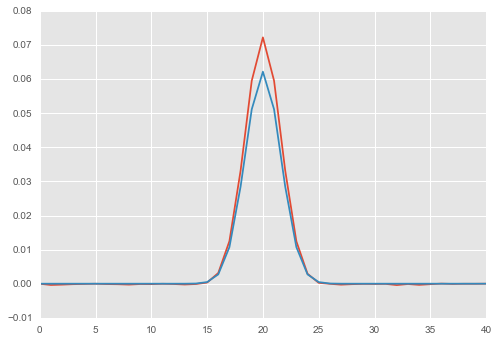

In [32]:
plt.plot(testObj2.psf1_fitted[20,:])
plt.plot(testObj2.psf1_orig[20,:])

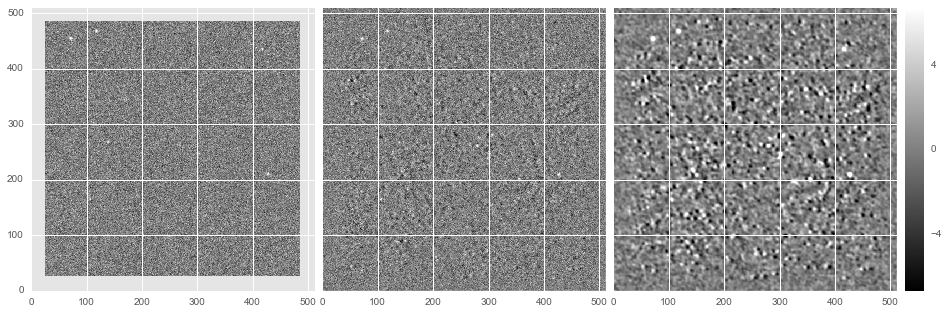

In [111]:
fig = plt.figure(1, (16, 16))
obj = testObj2
dit.plotImageGrid((obj.res.decorrelatedDiffim, obj.D_ZOGY.im, obj.S_corr_ZOGY.im))

In [38]:
D_ZOGY1 = testObj2.doZOGY(inImageSpace=True)
D_ZOGY2 = testObj2.doZOGY(inImageSpace=False)
fig = plt.figure(1, (12, 12))
dit.plotImageGrid((D_ZOGY2.im, D_ZOGY1.im))

(512, 512) (512, 512)
HERE
(41, 41) (512, 512) (512, 512)
(512, 512) (512, 512)
HERE
(41, 41) (512, 512) (512, 512)


RuntimeError: filter weights array has incorrect shape.

Have `dit.doZOGY()` store `K_r` and `K_n` in a global dict for inspection.

0.999999356258
0.999999356258


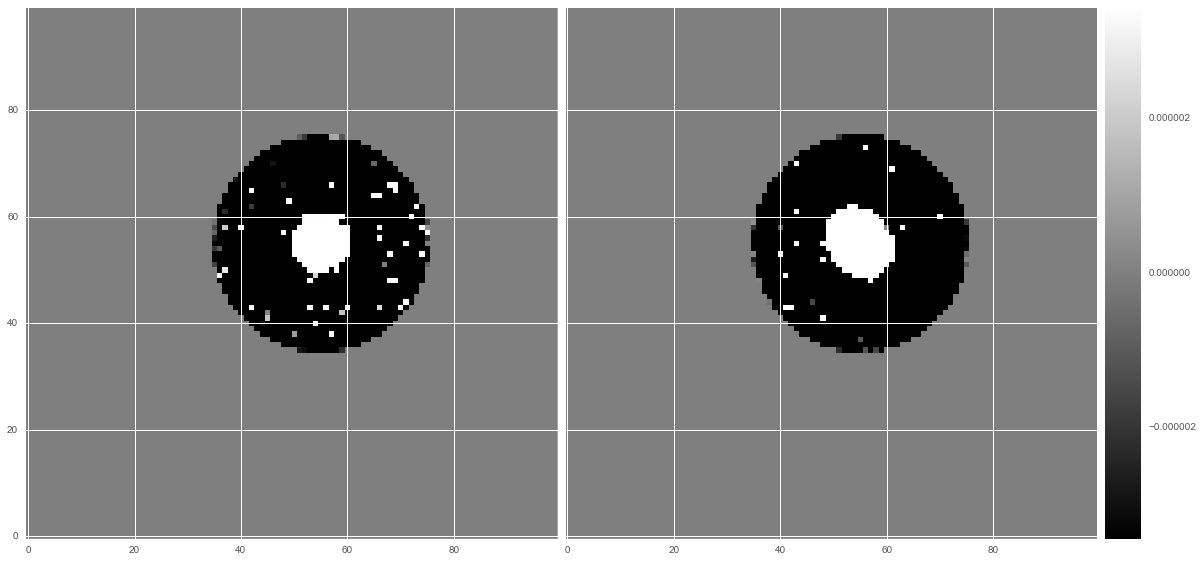

In [42]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift
fig = plt.figure(1, (20, 20))
print dit.global_dict['psf1'].sum()
print testObj2.psf1_fitted.sum()
dit.plotImageGrid((dit.global_dict['psf1'][200:300,200:300], dit.global_dict['psf2'][200:300,200:300],))
                   #dit.global_dict['P_r_hat'].real, dit.global_dict['P_n_hat'].real,
                   #dit.global_dict['K_r'], dit.global_dict['K_n'],
                   #fftshift(dit.global_dict['K_r_hat']).real, 
                   #fftshift(dit.global_dict['K_n_hat']).real))

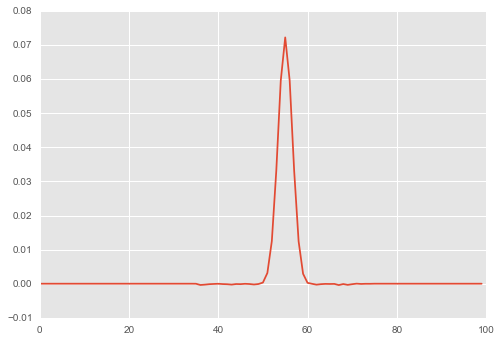

In [46]:
plt.plot(dit.global_dict['psf1'][255,200:300])

Add padding to the PSFs before FFTing and it seems to work better. But the pads need to be big (~30 pixels on each side), which can slow down the convolutions.

(0.0028777482742638836, 0.99166754589659034, -4.588122910469842, 5.9409378000404445)
(0.0030190212423562577, 0.97753324616804993, -4.6806234038925592, 5.916909453399569)
(7.8766102485458919e-05, 0.073481448775134892, -2.6504591704946132, 2.2078318541903554)


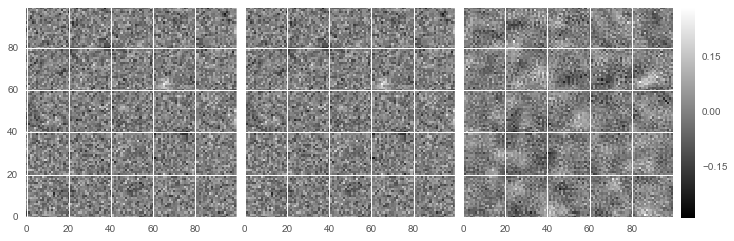

In [86]:
reload(dit)
testObj2a = testObj2.clone()
testObj2a.im1.psf = testObj2.psf1_fitted #orig
testObj2a.im2.psf = testObj2.psf2_fitted #orig
D_ZOGY1a = testObj2a.doZOGY(inImageSpace=True)
D_ZOGY2a = testObj2a.doZOGY(inImageSpace=False)
fig = plt.figure(1, (12, 12))
print dit.computeClippedImageStats(D_ZOGY2a.im)
print dit.computeClippedImageStats(D_ZOGY1a.im)
print dit.computeClippedImageStats(D_ZOGY2a.im - D_ZOGY1a.im)
dit.plotImageGrid((D_ZOGY2a.im[200:300,200:300], D_ZOGY1a.im[200:300,200:300],
                  D_ZOGY2a.im[200:300,200:300] - D_ZOGY1a.im[200:300,200:300]))

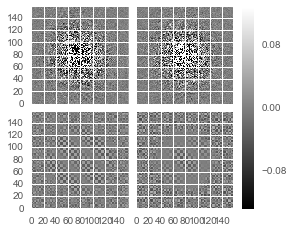

In [87]:
dit.plotImageGrid((dit.global_dict['K_r'], dit.global_dict['K_n'],
                  fftshift(dit.global_dict['K_r_hat'].real), 
                   fftshift(dit.global_dict['K_n_hat'].real)))

Looks like we need to filter in Fourier space before iFFT-ing. 

Take a look at
http://photutils.readthedocs.io/en/latest/photutils/psf_matching.html

Let's try emulating a top-hat filter and try that.

UPDATE: after talking to Ian, it seems that this may not be necessary or might not help.

But if you do, try the Blackman–Harris window: https://en.wikipedia.org/wiki/Window_function

Other pages:

http://photutils.readthedocs.io/en/latest/photutils/psf_matching.html

https://github.com/astropy/photutils/blob/master/photutils/psf/matching/fourier.py

https://github.com/astropy/photutils/blob/master/photutils/psf/matching/windows.py

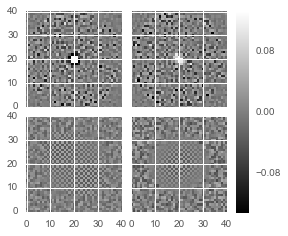

In [114]:
reload(dit)
D_ZOGY1 = testObj2.doZOGY(inImageSpace=True)
D_ZOGY2 = testObj2.doZOGY(inImageSpace=False)
from numpy.fft import fft2, ifft2, fftshift, ifftshift
dit.plotImageGrid((dit.global_dict['K_r'], dit.global_dict['K_n'],
                  fftshift(dit.global_dict['K_r_hat'].real), 
                   fftshift(dit.global_dict['K_n_hat'].real)))

0.0 1.0
-0.0402292169097 0.0407033656242
-0.0402292169097 0.0407033656242


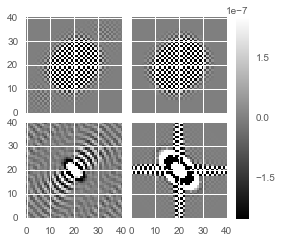

In [172]:
# From astropy.photutils.psf.matching.windows
def _radial_distance(shape):
    """
    Return an array where each value is the Euclidean distance from the
    array center.
    Parameters
    ----------
    shape : tuple of int
        The size of the output array along each axis.
    Returns
    -------
    result : `~numpy.ndarray`
        An array containing the Euclidian radial distances from the
        array center.
    """

    if len(shape) != 2:
        raise ValueError('shape must have only 2 elements')
    position = (np.asarray(shape) - 1) / 2.
    x = np.arange(shape[1]) - position[1]
    y = np.arange(shape[0]) - position[0]
    xx, yy = np.meshgrid(x, y)
    return np.sqrt(xx**2 + yy**2)

K_r_hat = fftshift(dit.global_dict['K_n_hat'])
K_r = dit.global_dict['K_n']
rd = _radial_distance(K_r_hat.shape)
th = (rd <= 15) * 1.0
print th.min(), th.max()
K_r_h = K_r_hat * th
print K_r_hat.real.min(), K_r_hat.real.max()
print K_r_h.real.min(), K_r_h.real.max()
kernel = np.real(ifft2(ifftshift(K_r_h)))
dit.plotImageGrid((K_r_hat.real, K_r_h.real, kernel, K_r))  # rd, th, 